## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Census Income dataset has 32,561 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Read data from file

In [3]:
df = pd.read_csv('adult_eda.csv')

In [4]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
29329,20,Self-emp-not-inc,54152,Some-college,10.0,Never-married,Craft-repair,Not-in-family,White,Female,0,0,35,United-States,<=50K
27783,20,Private,41356,Some-college,10.0,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
27133,55,Federal-gov,174533,Bachelors,13.0,Separated,Other-service,Unmarried,White,Female,0,0,72,?,<=50K
6368,22,Private,185279,HS-grad,9.0,Never-married,Handlers-cleaners,NaN,White,Male,0,0,16,United-States,<=50K
28424,18,Private,761006,11th,7.0,Never-married,Other-service,NaN,White,Female,0,0,20,United-States,<=50K
3966,49,Private,101825,Masters,14.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1977,40,United-States,>50K
10452,31,Local-gov,213307,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Female,0,0,40,United-States,<=50K
25119,37,Self-emp-inc,51264,Assoc-voc,11.0,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
10596,49,State-gov,31650,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,White,Female,0,0,45,United-States,<=50K
18519,71,Federal-gov,422149,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,40,United-States,>50K


## Try to understand what the data looks like? What are data types of the features? Are there any missing values?

In [6]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,31759.0,10.082843,2.576172,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [10]:
df.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [12]:
df.isna().sum()[df.isna().sum() > 0]
# only those fields which have null value

education-num     802
relationship     5068
dtype: int64

## Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.

In [14]:
df.sample(25)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8830,69,Self-emp-inc,169717,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,6418,0,45,United-States,>50K
20374,19,Self-emp-not-inc,100999,11th,7.0,Never-married,Adm-clerical,NaN,White,Female,0,0,30,United-States,<=50K
15533,21,Without-pay,232719,HS-grad,9.0,Never-married,Craft-repair,NaN,Black,Male,0,0,40,United-States,<=50K
22986,20,Private,85041,Some-college,10.0,Never-married,Exec-managerial,NaN,White,Female,0,0,20,United-States,<=50K
21312,61,Private,97030,Some-college,10.0,Divorced,Other-service,Not-in-family,White,Female,0,0,30,United-States,<=50K
16361,24,Private,210781,Bachelors,13.0,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,France,<=50K
17065,22,Private,270436,HS-grad,9.0,Never-married,Other-service,NaN,White,Male,0,0,40,United-States,<=50K
24030,47,Private,216096,Some-college,10.0,Married-spouse-absent,Exec-managerial,Unmarried,White,Female,0,0,35,Puerto-Rico,<=50K
23369,28,Private,249870,Prof-school,15.0,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,50,United-States,<=50K
30348,29,Private,250967,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,1887,48,United-States,>50K


In [15]:
df.select_dtypes('object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,NaN,White,Male,United-States,<=50K


In [16]:
df.select_dtypes('object').describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [17]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [18]:
for col in df.select_dtypes('object'):
    print(col)
    print('___________________________')
    print(df[col].value_counts())
    print('___________________________')

workclass
___________________________
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
___________________________
education
___________________________
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
___________________________
marital-status
___________________________
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    9

In [ ]:
# these fields have ? as a value , fix them 
# native-country 
# occupation 
# workclass

In [19]:
df.isin(['?']).any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [7]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [8]:
df.workclass.replace('?','Uknown', inplace=True)

/var/folders/ql/6jtsbr19249bjfqdx_b2n8640000gn/T/ipykernel_7431/1058256816.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.workclass.replace('?','Uknown', inplace=True)


In [9]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Uknown               1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [10]:
df = df.replace('?','Uknown')

In [11]:
for col in df.select_dtypes('object'):
    print(col)
    print('___________________________')
    print(df[col].value_counts())
    print('___________________________')

workclass
___________________________
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Uknown               1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
___________________________
education
___________________________
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
___________________________
marital-status
___________________________
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    9

In [12]:
df.isin(['?']).any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

## Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [28]:
df.tail(25)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32536,34,Private,160216,Bachelors,13.0,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32537,30,Private,345898,HS-grad,9.0,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,46,United-States,<=50K
32538,38,Private,139180,Bachelors,13.0,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,Uknown,287372,Doctorate,NaN,Married-civ-spouse,Uknown,Husband,White,Male,0,0,10,United-States,>50K
32540,45,State-gov,252208,HS-grad,9.0,Separated,Adm-clerical,NaN,White,Female,0,0,40,United-States,<=50K
32541,41,Uknown,202822,HS-grad,9.0,Separated,Uknown,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32542,72,Uknown,129912,HS-grad,9.0,Married-civ-spouse,Uknown,Husband,White,Male,0,0,25,United-States,<=50K
32543,45,Local-gov,119199,Assoc-acdm,12.0,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32544,31,Private,199655,Masters,14.0,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32545,39,Local-gov,111499,Assoc-acdm,12.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K


In [30]:
df.education.value_counts(dropna=False)

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [33]:
df['education-num'].value_counts(dropna=False)

education-num
9.0     10215
10.0     7098
13.0     5247
14.0     1687
11.0     1343
7.0      1146
12.0     1044
6.0       916
NaN       802
4.0       631
15.0      559
5.0       503
8.0       424
16.0      405
3.0       330
2.0       161
1.0        50
Name: count, dtype: int64

In [34]:
df.groupby('education')['education-num'].value_counts(dropna=False)

education     education-num
10th          6.0                916
              NaN                 17
11th          7.0               1146
              NaN                 29
12th          8.0                424
              NaN                  9
1st-4th       2.0                161
              NaN                  7
5th-6th       3.0                330
              NaN                  3
7th-8th       4.0                631
              NaN                 15
9th           5.0                503
              NaN                 11
Assoc-acdm    12.0              1044
              NaN                 23
Assoc-voc     11.0              1343
              NaN                 39
Bachelors     13.0              5247
              NaN                108
Doctorate     16.0               405
              NaN                  8
HS-grad       9.0              10215
              NaN                286
Masters       14.0              1687
              NaN                 36
Preschool 

In [37]:
df.drop('education-num', inplace=True, axis=1)

KeyError: "['education-num'] not found in axis"

In [38]:
df.sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11338,40,Private,145504,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K
31724,45,Local-gov,234195,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
27546,29,Private,406826,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K
10736,30,Private,243190,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K
18050,36,Private,189382,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
16288,34,Local-gov,105540,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2051,40,United-States,<=50K
20171,25,Private,71351,1st-4th,Never-married,Other-service,Other-relative,White,Male,0,0,25,El-Salvador,<=50K
6706,36,Private,300829,Assoc-acdm,Divorced,Adm-clerical,Unmarried,White,Female,0,0,42,United-States,<=50K
12110,48,Private,199058,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
18536,53,Private,195813,5th-6th,Married-civ-spouse,Craft-repair,Husband,Other,Male,5178,0,40,Puerto-Rico,>50K


## Impute missing value in relationship column with "Unmaried". Also replace "Not-in-family", "Other-relative" values in this column with "Unmaried"?

In [39]:
df.relationship.value_counts(dropna=False)

relationship
Husband           13193
Not-in-family      8305
NaN                5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [40]:
df['marital-status'].value_counts(dropna=False)

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [43]:
df.groupby('marital-status')['relationship'].value_counts(dropna=False)

marital-status         relationship  
Divorced               Not-in-family      2404
                       Unmarried          1601
                       NaN                 328
                       Other-relative      110
Married-AF-spouse      Wife                 12
                       Husband               9
                       Other-relative        1
                       NaN                   1
Married-civ-spouse     Husband           13184
                       Wife               1556
                       Other-relative      124
                       NaN                  95
                       Not-in-family        17
Married-spouse-absent  Not-in-family       211
                       Unmarried           130
                       NaN                  45
                       Other-relative       32
Never-married          Not-in-family      4706
                       NaN                4485
                       Unmarried           881
                      

In [44]:
df.relationship.replace(['Not-in-family','Other-relative',np.nan],'Unmarried',inplace=True)

In [45]:
df.relationship.value_counts(dropna=False)

relationship
Unmarried    17800
Husband      13193
Wife          1568
Name: count, dtype: int64

In [46]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Take a look at correlation between variable and also see if there are some outliers in any of the columns

In [ ]:
df.describe().T

## IF std is greater than the mean -> there may be some outliers 

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [49]:
df.select_dtypes('number').corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


<Axes: >

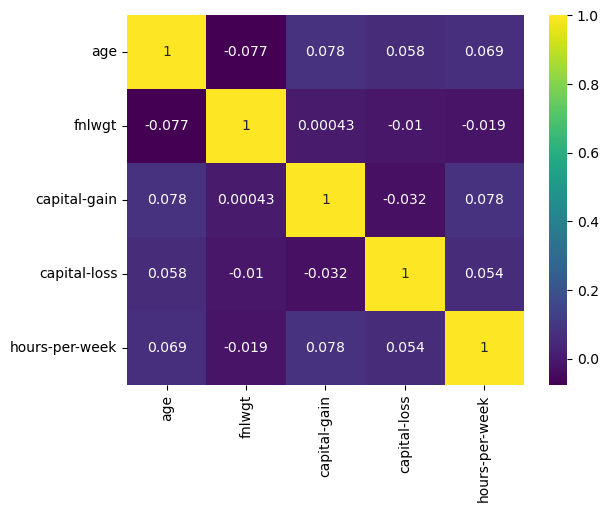

In [52]:
corr_df = df.select_dtypes('number').corr()
sns.heatmap(data = corr_df, annot=True, cmap='viridis')


## find outlier values which extends the upper limit in both age and hours - per - week columns

age

<Axes: xlabel='age', ylabel='Count'>

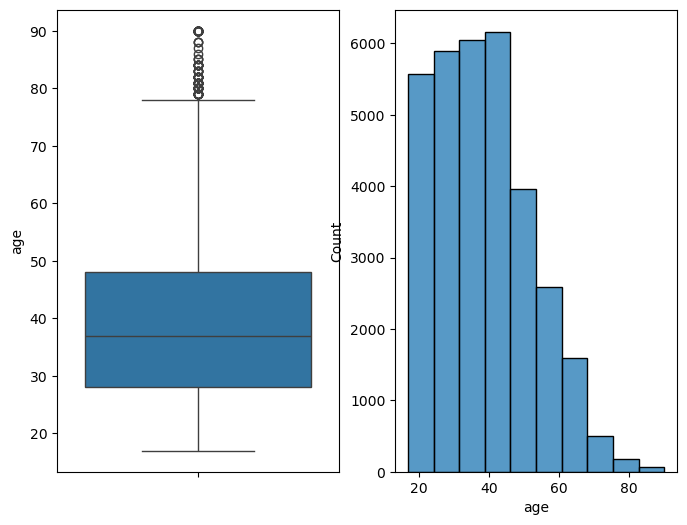

In [53]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(data = df.age, whis = 1.5)
plt.subplot(1,2,2)
sns.histplot(data = df.age, bins = 10)

hours-per-week

In [54]:
df[df.age > 78]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
74,79,Private,124744,Some-college,Married-civ-spouse,Prof-specialty,Unmarried,White,Male,0,0,20,United-States,<=50K
222,90,Private,51744,HS-grad,Never-married,Other-service,Unmarried,Black,Male,0,2206,40,United-States,<=50K
430,80,Uknown,107762,HS-grad,Widowed,Uknown,Unmarried,White,Male,0,0,24,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
1040,90,Private,137018,HS-grad,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32277,90,Private,313749,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
32367,90,Local-gov,214594,7th-8th,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K
32459,85,Private,98611,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
32494,82,Uknown,403910,HS-grad,Never-married,Uknown,Unmarried,White,Male,0,0,3,United-States,<=50K


<Axes: xlabel='hours-per-week', ylabel='Count'>

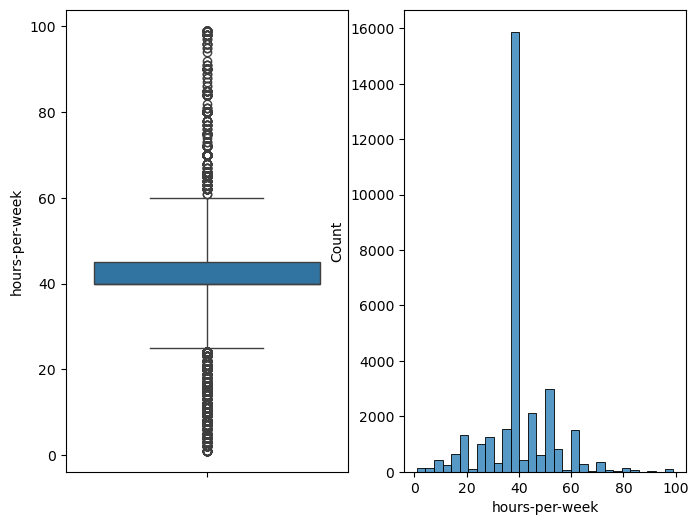

In [60]:
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
sns.boxplot(data = df['hours-per-week'], whis=3)
plt.subplot(1, 2, 2)
sns.histplot(data = df['hours-per-week'], bins=30)

In [61]:
df[df['hours-per-week'] > 85]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
272,50,Self-emp-not-inc,30653,Masters,Married-civ-spouse,Farming-fishing,Husband,White,Male,2407,0,98,United-States,<=50K
935,37,Private,176900,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K
1172,25,Private,404616,Masters,Married-civ-spouse,Farming-fishing,Unmarried,White,Male,0,0,99,United-States,>50K
1417,31,Private,179186,Bachelors,Married-civ-spouse,Sales,Husband,Black,Male,0,0,90,United-States,>50K
1730,24,Private,180060,Masters,Never-married,Exec-managerial,Unmarried,White,Male,6849,0,90,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31699,43,Self-emp-not-inc,163108,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
31849,21,Self-emp-not-inc,304602,Assoc-voc,Never-married,Farming-fishing,Unmarried,White,Male,0,0,98,United-States,<=50K
32402,42,Private,288154,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,89,United-States,>50K
32469,58,Self-emp-inc,181974,Doctorate,Never-married,Prof-specialty,Unmarried,White,Female,0,0,99,Uknown,<=50K


In [62]:
df[df['hours-per-week'] > 85][['relationship', 'race']].value_counts()

relationship  race              
Husband       White                 80
Unmarried     White                 45
Husband       Black                  6
Unmarried     Black                  5
Wife          White                  4
Husband       Asian-Pac-Islander     3
Unmarried     Asian-Pac-Islander     2
Husband       Other                  1
Name: count, dtype: int64

## After looking att the outliers you can drop the rows which actually does not make any sense


In [64]:
df[(df.age > 80) & (df['hours-per-week'] > 60)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K


In [65]:
df.shape

(32561, 14)

In [66]:
drop_index = df[(df.age > 80) & (df['hours-per-week'] > 60)].index
df.drop(index=drop_index,inplace=True)

In [67]:
df.shape

(32558, 14)

## how many of each race are represented in this dataset

<Axes: xlabel='race', ylabel='count'>

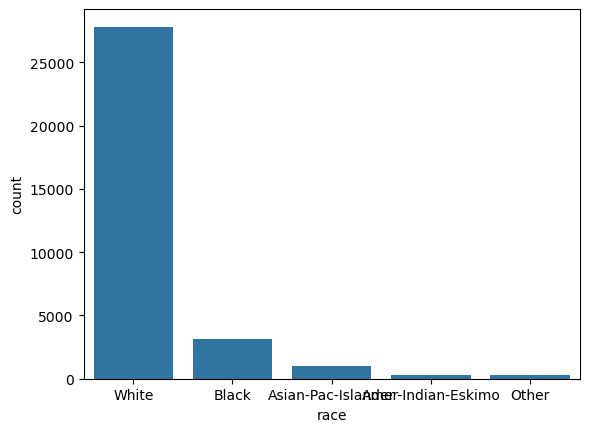

In [68]:
sns.countplot(x = 'race', data=df)

## what is average age of men/women

In [69]:
df[df.sex == 'Male']['age'].mean()

39.42686005416074

In [70]:
df[df.sex == 'Female']['age'].mean()

36.85823043357163

In [71]:
df.groupby('sex')['age'].mean()

sex
Female    36.85823
Male      39.42686
Name: age, dtype: float64

## what is the percent of people who have a bachelor's degree

In [74]:
df[df.education == 'Bachelors'].shape[0] / len(df)

0.16447570489587812

In [75]:
df[df.education == 'Bachelors'].shape[0] / len(df) * 100

16.44757048958781

In [76]:
round(df[df.education == 'Bachelors'].shape[0] / len(df) * 100,3)

16.448

In [77]:
df['education'].value_counts(normalize=True)

education
HS-grad         0.322501
Some-college    0.223939
Bachelors       0.164476
Masters         0.052890
Assoc-voc       0.042447
11th            0.036089
Assoc-acdm      0.032772
10th            0.028657
7th-8th         0.019842
Prof-school     0.017661
9th             0.015787
12th            0.013299
Doctorate       0.012685
5th-6th         0.010228
1st-4th         0.005160
Preschool       0.001566
Name: proportion, dtype: float64

## what percent of people with advanced education(bachelors, masters, or doctorate) make more than 50K?

In [79]:
adv_edu = df[(df.education == 'Bachelors') | (df.education == 'Masters')| (df.education == 'Doctorate')]
adv_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,Uknown,287372,Doctorate,Married-civ-spouse,Uknown,Husband,White,Male,0,0,10,United-States,>50K
32544,31,Private,199655,Masters,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [80]:
adv_edu[adv_edu.salary == '>50K']

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,>50K
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,Uknown,287372,Doctorate,Married-civ-spouse,Uknown,Husband,White,Male,0,0,10,United-States,>50K


In [84]:
adv_edu[adv_edu.salary == '>50K'].shape[0] / len(adv_edu) * 100

46.54205607476635

In [85]:
adv_edu.salary.value_counts(normalize=True)

salary
<=50K    0.534579
>50K     0.465421
Name: proportion, dtype: float64

## what percent of people without advanced education(bachelors, masters, or doctorate) make more than 50K?

In [86]:
not_adv_edu = df[~(df.education == 'Bachelors') | (df.education == 'Masters')| (df.education == 'Doctorate')]
not_adv_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,<=50K


In [87]:
not_adv_edu.salary.value_counts(normalize=True)

salary
<=50K    0.793442
>50K     0.206558
Name: proportion, dtype: float64